# Syfte
Syftet med dagens laborationen är att du skall:
* träna på olika sätt att illustrera och beskriva ett datamaterial i Python
* få förståelse för begreppen fördelningsfunktion, täthets- och sannolikhetsfunktion samt sambandet mellan stickprov och population
* träna på att beräkna sannolikheter i Python
* bli bekant med inversmetoden för att generera slumptal

# Förberedelseuppgifter
* Förvissa dig om att du förstår vad täthetsfunktion och fördelningsfunktion är och hur de förhåller sig till varandra.
* Vad är en kvantil?
* Ta reda på hur man använder inversmetoden för att transformera slumptal till en önskad fördelning. (Kap.~8.4).

# Python paket
Vi kommer använda följande paket i Python

* **numpy** Grundläggande linjär algebra och nummerik.
* **scipy.stats** För beräkningar av täthets- och fördelningsfunktioner.
* **pandas** För data hantering.
* **matplotlib.pyplot** Grundläggande plot-funktioner.
* **seaborn** Bättre plot-funktioner för pandas objekt.

## Importera moduler och ladda upp filer till Colab
Börja med att importera ett antal Python paket (om du inte använder *colabs* kan du behöva installera paketen först)


In [640]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utöver modulerna ovan använder laborationen data materialet i **kroppsTemp.csv**. För att komma åt data måste du:
1. Ladda ner **kroppsTemp.csv** från kurshemsidan
2. Klicka på mappen *Filer* till vänster i *google colab* menyn
3. Ladda upp **kroppsTemp.csv** genom att klicka på *Ladda upp till sessionens lagringsutrymme* (eller drag-n-drop filen)
4. Om du får ett **FileNotFoundError** när du försöker importera **kroppsTemp.csv** högerklicka på **kroppsTemp.csv** i google colab och *Kopiera sökväg*. Klistra sedan katalog namnet på platsen för **/content/kroppsTemp.csv**

In [641]:
#google colabs
# T = pd.read_csv(r"/content/kroppsTemp.csv")

Om du använder Python lokal på datorn, använd istället följande för att läsa in **kroppsTemp.csv**.

In [642]:
#egen dator med kroppsTemp.csv i samma folder.
T = pd.read_csv("kroppsTemp.csv")        

# Relativa frekvenser och fördelningar
I denna del av laborationen ska vi använda ett datamaterial av kroppstemperatur hos 130 st friska 18--40 åringar (Mackowiak, Wasserman, Levine. (1992)
  *A critical appraisal of 98.6 degrees F, the upper limit of the normal body temperature*). Data finns i filen **kroppsTemp.csv** på kurshemsidan.


## Kroppstemperatur
Läsa in och titta på data (kom ihåg att lägga csv-filen i samma katalog som ditt Python script, eller ange en lämplig relativ sökväg)

In [643]:
print(T)
print(T.describe())

     Temperatur  Kvinna
0     35.722222       1
1     35.944444       1
2     36.055556       1
3     36.111111       1
4     36.166667       1
..          ...     ...
125   37.388889       0
126   37.444444       0
127   37.722222       0
128   37.777778       0
129   38.222222       0

[130 rows x 2 columns]
       Temperatur      Kvinna
count  130.000000  130.000000
mean    36.805128    0.500000
std      0.407324    0.501934
min     35.722222    0.000000
25%     36.555556    0.000000
50%     36.833333    0.500000
75%     37.055556    1.000000
max     38.222222    1.000000


Data består av två kolumner där den första är temperaturer (i C) och den andra indikerar om personen var man (=0) eller kvinna (=1). 

En god regel, när man står inför ett nytt datamaterial, är att rita upp det på några olika sätt. Vi börjar med ett histogram, titta först på hjälp texten för att förstå hur funktionen fungerar


In [644]:
help( sns.histplot )

Help on function histplot in module seaborn.distributions:

histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs
)
    Plot univariate or bivariate histograms to show distributions of datasets.

    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.

    This function can normalize the statistic computed within each 

Vi använder nu funktionen för att göra ett histogram:

<Axes: xlabel='Temperatur', ylabel='Count'>

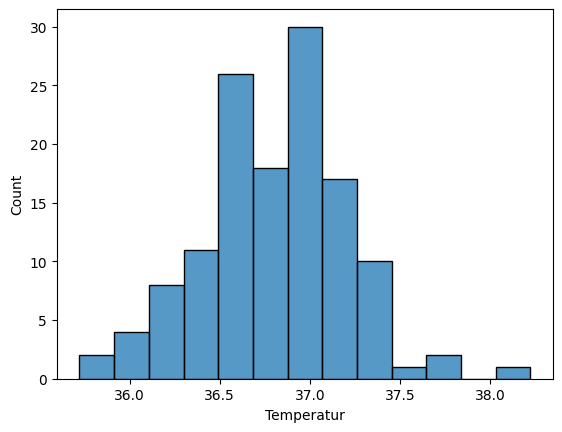

In [645]:
sns.histplot(T, x="Temperatur")

Vi kan också plotta data som en funktion av index

<Axes: xlabel='None', ylabel='Temperatur'>

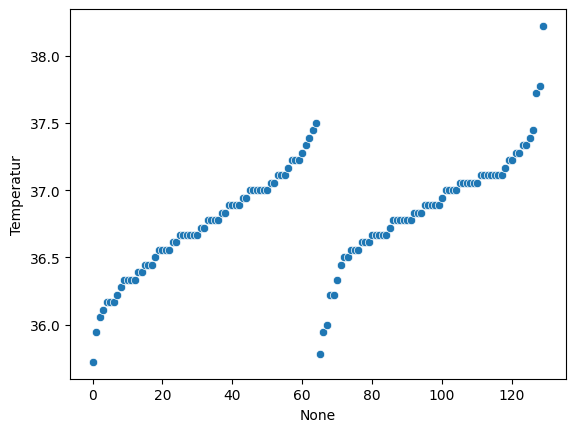

In [646]:
sns.scatterplot(T, x=T.index, y="Temperatur") # punktdiagram

och relatera det till histogrammet. Här anger **T** vilket datamaterial att använda och **x=** och **y=** vilka kolumner i **T** som ska plottas på vilka axlar. Bättre är att lägga båda i samma figur

<Axes: xlabel='Temperatur', ylabel='Count'>

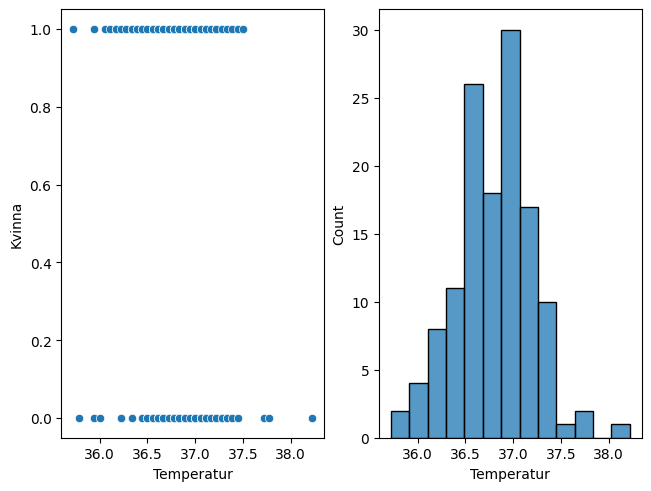

In [647]:
fig, axs = plt.subplots(1, 2, constrained_layout=True) # skapar en figur 'fig', axs som axlar i figuren där vi definierar 1 rad och 2 kolumner, dvs två diagram bredvid varandra.
sns.scatterplot(T, x=T.Temperatur, y=T.Kvinna, ax=axs[0]) # scatterplot visar punkter för varje observation med Temperatur på x-axeln och Kvinna på y-axeln, ritar alltså en punkt diagram
sns.histplot(T, x=T.Temperatur, ax=axs[1]) # histogram visar fördelningen av Temperaturvärdena

Här genererar **plt.subplots** två del figurer och **ax=** anger vilken delfigur respektive plot ska hamna i.

**Mozquizto:** Jämför histogrammet med ploten.  Hur syns egenskaperna hos data i histogrammet, och tvärtom?

**sns.scatterplot** ser vi att data är grupperat i män och kvinnor. För att jämföra data mellan flera grupper kan vi dela data baserat på kön.

<Axes: xlabel='Temperatur', ylabel='Count'>

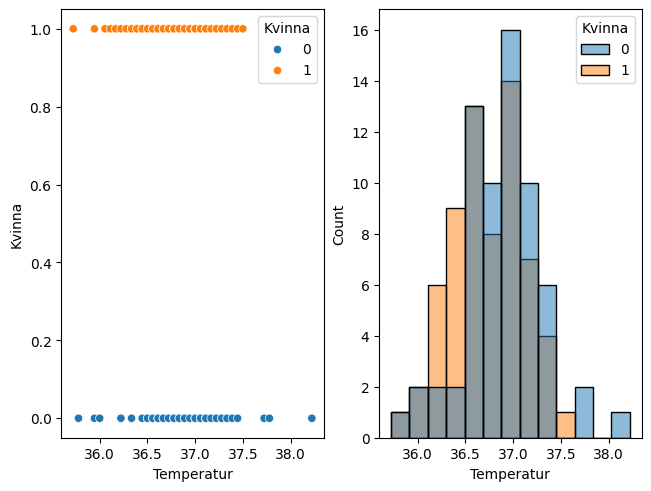

In [648]:
fig, axs = plt.subplots(1, 2, constrained_layout=True)
sns.scatterplot(T, x=T.Temperatur, y=T.Kvinna, hue=T.Kvinna, ax=axs[0])
sns.histplot(T, x=T.Temperatur, hue=T.Kvinna, ax=axs[1]) # Hue används för att färglägga datapunkter typ

Genom att använda **displot** och **col** istället för **hue** för vi två histogram bredvid varandra, pröva.

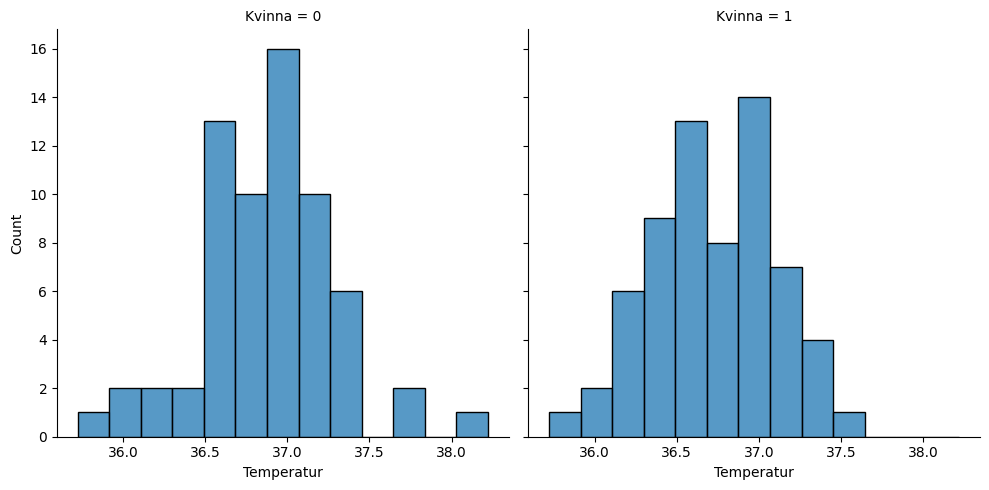

In [649]:
sns.displot(T, x=T.Temperatur, col=T.Kvinna)

Ett annat alternativ för att jämföra data är att använda **sns.boxplot**

<Axes: xlabel='Kvinna', ylabel='Temperatur'>

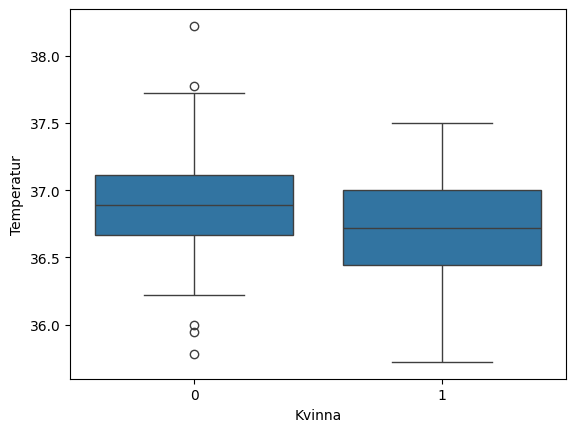

In [650]:
sns.boxplot(T, x=T.Kvinna, y=T.Temperatur)

Ett bättre alternativ till **sns.boxplot** är ibland **sns.violinplot**.

<Axes: xlabel='Kvinna', ylabel='Temperatur'>

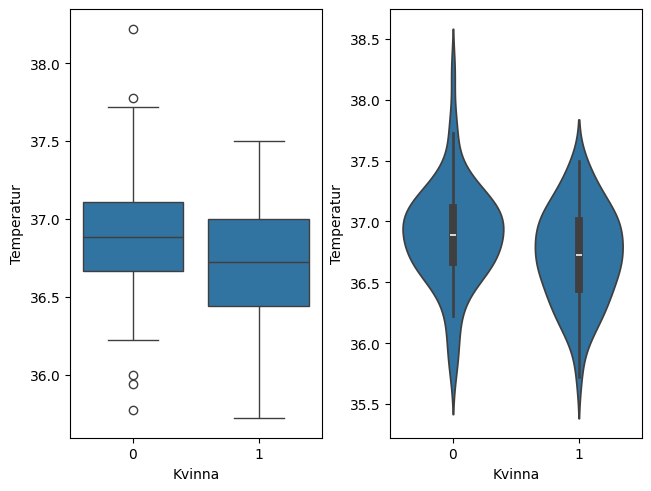

In [651]:
fig, axs = plt.subplots(1, 2, constrained_layout=True)
sns.boxplot(T, x=T.Kvinna, y=T.Temperatur, ax=axs[0])
sns.violinplot(T, x=T.Kvinna, y=T.Temperatur, ax=axs[1])

**Mozquizto:** Jämför histogram och box-/violinplot. Är det någon skillnad mellan män och kvinnor? Hur stor verkar skillnaden vara?

Vi kan också använda **groupby** funktionen i pandas för att titta på skillnader mellan män och kvinnor

In [652]:
print(T.groupby(T.Kvinna).describe().transpose())

Kvinna                    0          1
Temperatur count  65.000000  65.000000
           mean   36.885470  36.724786
           std     0.413049   0.388198
           min    35.777778  35.722222
           25%    36.666667  36.444444
           50%    36.888889  36.722222
           75%    37.111111  37.000000
           max    38.222222  37.500000


Eftersom skillnaden inte är särskilt stor fortsätter vi att analysera alla data på en gång. Ett annat sätt är att rita en empirisk tähets- eller fördelningsfunktionen.

<Axes: xlabel='Temperatur', ylabel='Proportion'>

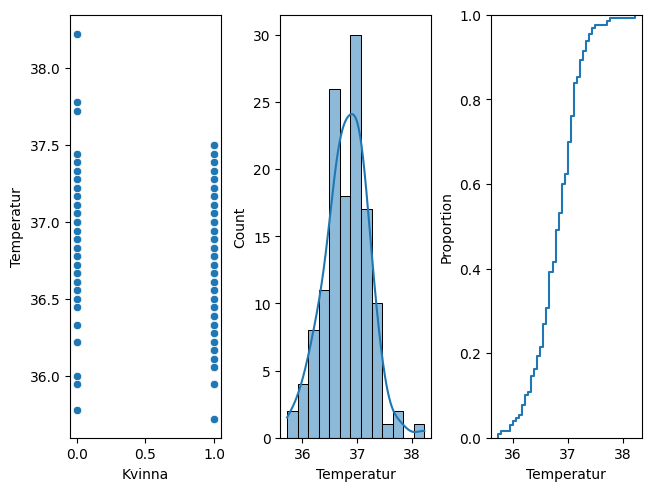

In [653]:
fig, axs = plt.subplots(1, 3, constrained_layout=True)
sns.scatterplot(T, x=T.Kvinna, y=T.Temperatur, ax=axs[0])
sns.histplot(T, x=T.Temperatur, stat="count", kde=True, ax=axs[1]) # Stats är count, density, percent, proportion, probability
sns.ecdfplot(T, x=T.Temperatur, ax=axs[2])

Här anger **stat** vilken skalning av histogram vi vill ha:
* **count** Antal observationer i varje indelning.
* **frequency** Antalet observationer delat med intervall bredd.
* **probability/proportion** Andel observationer i varje indelning
* **density** Standardisera så att arean av histogrammet är 1 (dvs täthetsfunktion).

och **kde=True** anger att en ***k**ernal **d**ensity **e**stimation* (dvs skattning av tätheten) ska ritas in i histogrammet. Även här kan vi jämföra kvinnor och män


<Axes: xlabel='Temperatur', ylabel='Proportion'>

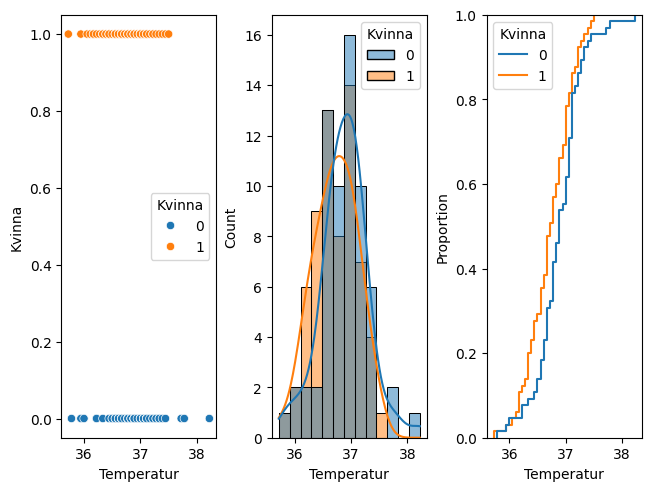

In [654]:
fig, axs = plt.subplots(1, 3, constrained_layout=True)
sns.scatterplot(T, x=T.Temperatur, y=T.Kvinna, hue=T.Kvinna, ax=axs[0])
sns.histplot(T, x=T.Temperatur, hue=T.Kvinna, stat="count", kde=True, ax=axs[1])
sns.ecdfplot(T, x=T.Temperatur, hue=T.Kvinna, ax=axs[2])

**Uppgift:** Jämför scatterplot, histogram/täthet och fördelningsfunktionerna. Hur hänger de ihop med varandra?

**Uppgift:** Välj ut några datapunkter i de olika figurerna och försök hitta dem i de andra figurerna.

I fördelningsfunktionen kan vi avläsa hur många av observationerna som är mindre än eller lika med ett visst tal.

**Uppgift:** Välj $x = 37$ och försök avgöra i figurerna (histogram/täthet och fördelningsfunktionerna) hur många av värdena som är mindre än eller lika med 37.

När antalet observationer i stickprovet ökar kan vi tolka kvoten som sannolikheten att få ett värde mindre än eller lika med $x$. Antalet och kvoten kan beräknas som:

In [655]:
print('Antal mindre än:', np.sum(T.Temperatur<=36.2), 'av', T.shape[0] )
print('Andel mindre än:', np.mean(T.Temperatur<=36.2) )

Antal mindre än: 10 av 130
Andel mindre än: 0.07692307692307693


**Uppgift:** Stämmer det med din uppskattning från figuren?

För att förstå hur **T.Temperatur<=?** fungerar så jämför vi det med ursprungsdata:

In [656]:
print( T.Temperatur )
print( T.Temperatur<=37 )

0      35.722222
1      35.944444
2      36.055556
3      36.111111
4      36.166667
         ...    
125    37.388889
126    37.444444
127    37.722222
128    37.777778
129    38.222222
Name: Temperatur, Length: 130, dtype: float64
0       True
1       True
2       True
3       True
4       True
       ...  
125    False
126    False
127    False
128    False
129    False
Name: Temperatur, Length: 130, dtype: bool


Vad är det som händer?

**Mozquizto:** Pröva med några andra värden på $x$.  Hur borde andelen ändra sig när $x$ ökar respektive minskar? Jämför med figuren.

Den omvända proceduren, hitta det värde $x$ som motsvarar en given sannolikhet, dvs en given kvantil, är ofta viktigare.  Vi återkommer till det lite senare.

## Kommer data från en standardfördelning?
Histogrammet och den empiriska fördelningsfunktionen kan jämföras med täthet- och fördelningsfunktioner för standardfördelningar för att undersöka om någon sådan passar som modell för data.

**Uppgift:** Påminner histogrammet och fördelningsfunktionen om någon vanliga modell för stokastiska variabler?

**Mozquizto:** Innan vi kan jämföra data med standard fördelningar behöver vi beräkna medelvärde och stickprovsstandardavvikelse, använd att en **pandas dataframe** har funktioner för **mean** och **std**. 

Spara värdena i variablerna **mu** och **sigma** de behövs senare.

In [657]:
mu = T.Temperatur.mean()
sigma = T.Temperatur.std()
print("medelvärde=", mu  )
print("standardavvikelse=", sigma )

medelvärde= 36.80512823076923
standardavvikelse= 0.4073239677872093


Vi kan nu jämföra histogrammet med täthetsfunktionen för en normalfördelning. För att beräkna normalfördelningen använder vi

In [658]:
help( stats.norm )

Help on norm_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.norm_gen object>
    A normal continuous random variable.

    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.

    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.

    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometim

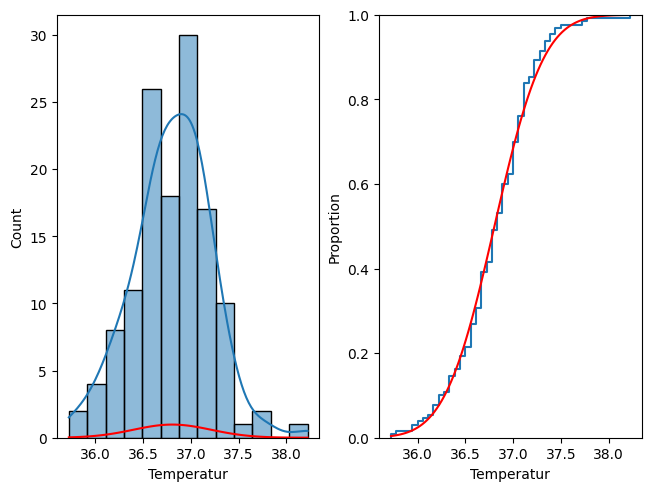

In [659]:
fig, axs = plt.subplots(1, 2, constrained_layout=True)
sns.histplot(T, x=T.Temperatur, stat="count", kde=True, ax=axs[0])
sns.ecdfplot(T, x=T.Temperatur, ax=axs[1])

#konstruera en vektor med 100 värden från minsta till största temperatur
x = np.linspace(min(T.Temperatur), max(T.Temperatur), 100)
#beräkna normaltäthet med de skattade parametrarna
p = stats.norm.pdf(x, mu, sigma) # Normalfördelningens täthetsfunktion
#och fördelningsfunktion med de skattade parametrarna
F = stats.norm.cdf(x, mu, sigma) # Normalfördelningens fördelningsfunktion

#addera dessa till figuren
axs[0].plot(x,p,'r')
axs[1].plot(x,F,'r')

Ett alternativ är att jämföra empiriska och teoretiska kvantiler i data, om vi har rätt fördelnings antagande bör dessa ligga på en rak linje.

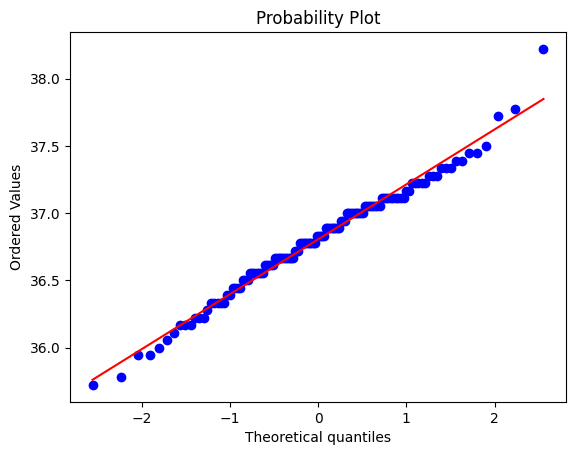

In [660]:
fig = stats.probplot(T.Temperatur, dist="norm", fit=True, plot=plt) # probability plot

Här anger **dist="norm"** att vi är intresserade av en normalfördelning, **fit=True** att parametrarna ska skattas från data och **plot=plt** att **matlibplot** ska användas för att illustrerar data. Vi kan också jämföra data med rektangel- (uniform) och exponentialfördelningar:

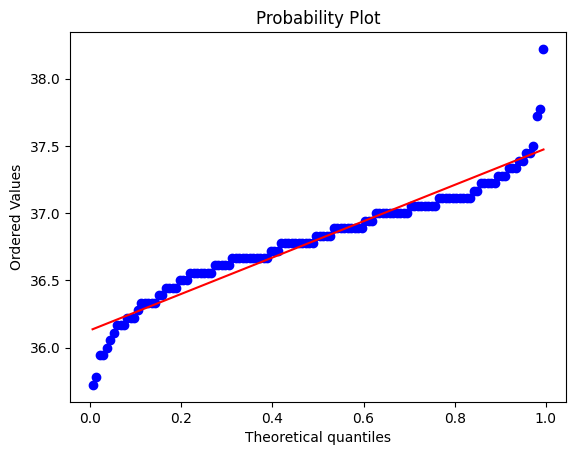

In [661]:
fig = stats.probplot(T.Temperatur, dist=stats.uniform, fit=True, plot=plt)

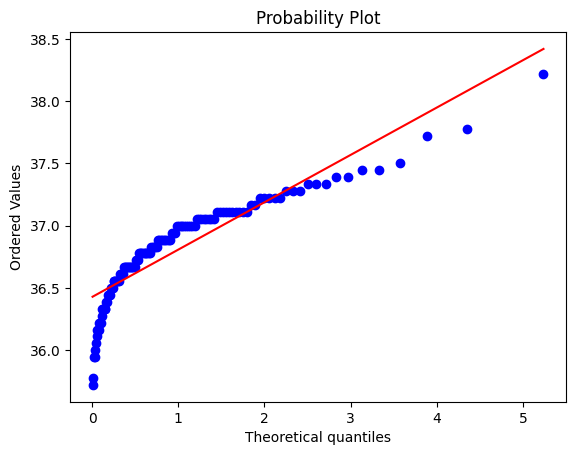

In [662]:
fig = stats.probplot(T.Temperatur, dist=stats.expon, fit=True, plot=plt)

**Mozquizto:** Vilken fördelning verkar data komma från?

## Större stickprov --- Fördelningsfunktionen för en slumpvariabel
En intressant fråga är hur storleken på datamaterialet påverkar hur bra anpassningarna kan förväntas bli. För att undersöka effekten av antalet observationer vill vi nu studera både ett större och ett mindre datamaterial, t.ex. $20$ eller $2000$ observationer från samma fördelning som tidigare. Eftersom vi bara har $130$ observationer simulerar vi ny data 

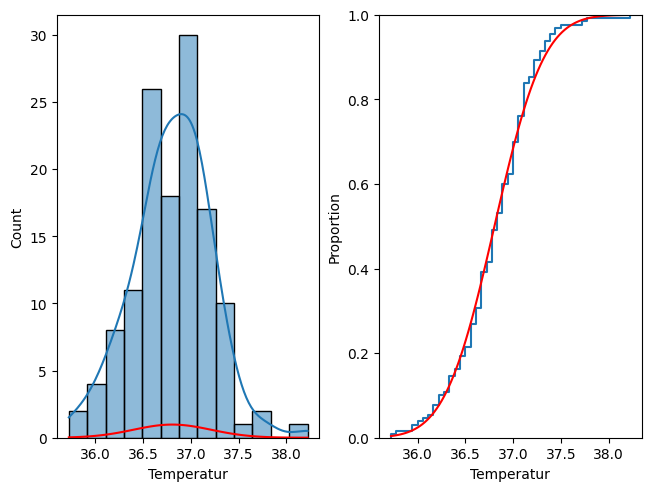

In [663]:
N = 20 #pröva 20, 200 eller 2000
data = stats.norm.rvs(mu, sigma, size=N)
#placera den resulterande vektorn som en kolumn i en DataFrame
data = pd.DataFrame({"x":data})

#samma plottar som tidigare (tänk på namnet av kolumnen i data)
fig, axs = plt.subplots(1, 2, constrained_layout=True)
sns.histplot(data, x=T.Temperatur, stat="count", kde=True, ax=axs[0])
sns.ecdfplot(data, x=T.Temperatur, ax=axs[1])

#addera exakta täthets- och fördelningsfunktioner till figuren
axs[0].plot(x,p,'r')
axs[1].plot(x,F,'r')

Vi kan också titta på kvantil ploten.

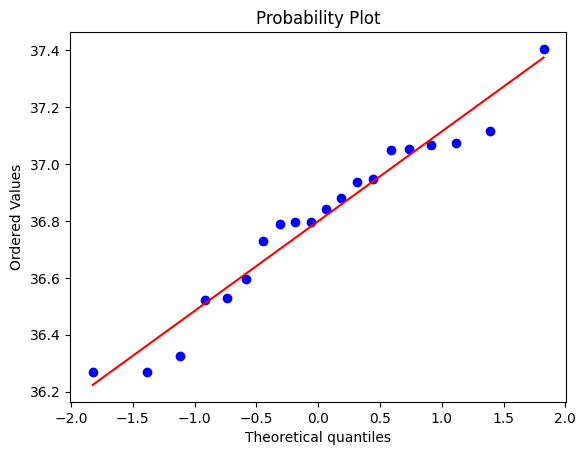

In [664]:
fig = stats.probplot(data.x, dist="norm", fit=True, plot=plt)

**Uppgift:** Hur förändras histogram och empirisk fördelningsfunktion när antalet observationer ökar? Hur bra stämmer dessa med sina teoretiska motsvarigheterna?

**Uppgift:** Vad blir nu andelen värden som är mindre än eller lika med 37? Hur mycket ändrar det sig mellan olika simuleringar?

In [665]:
print("Från simulerad data P(X<=37) = ", np.mean( stats.norm.rvs(mu, sigma, size=N) <= 36.8 ) )
print("Från observationer data P(X<=37) = ", np.mean(T.Temperatur <= 36.8))

Från simulerad data P(X<=37) =  0.45
Från observationer data P(X<=37) =  0.49230769230769234



Eftersom resultatet närmare sig en normalfördelning kan vi beräkna andelen värden som är $\leq 37$ som $\text{P}(X\leq 37) = F_X(37)$ där $X\in \text{N}(\mu,\sigma)$. Använd funktionen **stats.norm.cdf** för att beräkna $\text{P}(X\leq 37)$.


In [666]:
print("P(X<=37) = ", stats.norm.cdf(37, mu, sigma))

P(X<=37) =  0.683824206491563


**Mozquizto:** Hur stämmer sannolikhets beräkningen med tidigare beräkningar av andelen värden som är mindre än eller lika med 37 (eller andra värden på $x$)? 

## Kvantiler
Begreppet **kvantil** är viktigt. Kvantilen kan definieras på olika sätt men vi (och många andra) använder följande definition: kvantilen är det tal $x_{\alpha}$ som uppfyller

$ \text{P}(X \leq x_{\alpha}) = 1 - \alpha $

där $\alpha$ är ett tal mellan 0 och 1 (vanliga val är: 0.05, 0.01, 0.001).

**Mozquizto:** Läs av kvantilen $x_{0.05}$ där $\alpha = 0.05$ ur dina figurer, med hjälp av definitionen ovan. Både som skattningar i de två empiriska fördelningsfunktionerna och exakt i den teoretiska.

**Mozquizto:** Jämför med det exakta värdet, som kan fås med funktionen **stats.norm.ppf** 

In [667]:
help(stats.norm)

Help on norm_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.norm_gen object>
    A normal continuous random variable.

    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.

    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.

    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometim

In [679]:
print("Kvantil från simulerad data:", np.quantile( stats.norm.rvs(mu, sigma, size=N), 0.95)) # kan skrivas som data["x"] istället för stats.norm.rvs etc
print("Teoretisk kvantil:", stats.norm.ppf(0.95, mu, sigma) )

Kvantil från simulerad data: 37.21631484868231
Teoretisk kvantil: 37.47511653652828


**Uppgift:** Hur mycket skiljer $x_{0.05}$ baserat på $50$, $100$, $500$ eller $2000$ simulerade observationer?

Hur datasetets storlek påverkar osäkerheten i uppskattningarna kommer vi tillbaka till under hela resten av kursen.

## Andra fördelningar
Vi ska nu rita upp några andra normalfördelningar, $\text{N}(\mu,\sigma)$, och se hur de ändrar sig när vi ändrar på parametrarna $\mu$ och $\sigma$.

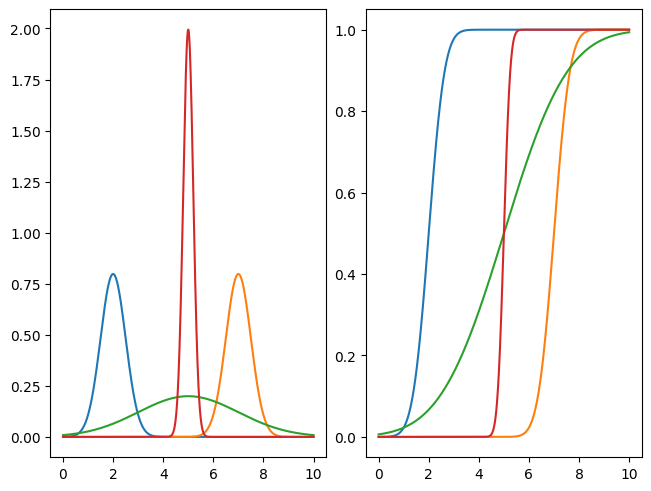

In [669]:
x = np.linspace(0, 10, 1000)

fig, axs = plt.subplots(1, 2, constrained_layout=True)
#N(2, 0.5) täthet
axs[0].plot(x, stats.norm.pdf(x, 2, 0.5))
#Plotta lite andra normaltätheter här, t.ex. N(7, 0.5), N(5, 2) & N(5, 0.2)
axs[0].plot(x, stats.norm.pdf(x, 7, 0.5))
axs[0].plot(x, stats.norm.pdf(x, 5, 2))
axs[0].plot(x, stats.norm.pdf(x, 5, 0.2))
# axs[0].plot(x, stats.norm.pdf(x, 5, 0.2))


#N(2, 0.5) fördelningsfunktionen
axs[1].plot(x, stats.norm.cdf(x, 2, 0.5))
#Plotta lite andra normalfördelningar här, t.ex. N(7, 0.5), N(5, 2) & N(5, 0.2)
axs[1].plot(x, stats.norm.cdf(x, 7, 0.5))
axs[1].plot(x, stats.norm.cdf(x, 5, 2))
axs[1].plot(x, stats.norm.cdf(x, 5, 0.2))
# axs[1].plot(x, stats.norm.cdf(x, 5, 0.2))

**Uppgift:** Vad händer med fördelningen när $\mu$ och $\sigma$ ändras?  Vad representerar $\mu$ och $\sigma$ i fördelningen?

**Uppgift:** Fördelningsfunktionen är ju integralen av täthetsfunktionen. 

Relatera dem till varandra i figuren. Hur ändrar sig, t.ex. fördelningsfunktionen när $x$ ligger nära $\mu$ jämfört med när $x$ ligger långt från $\mu$? Hur ser täthetsfuktionen ut då (stor eller liten?)

**Mozquizto:** Experimentera med andra värden på $\mu$ och $\sigma$ och se vad som händer.  Du kan behöva ändra **x** för att för att få plats i figuren (tips: det allra mesta av en normalfördelning ryms inom $\mu \pm 4\sigma$).

# Inversmetoden
Ett sätt att få fram slumptal från olika fördelningar är att använda inversmetoden. Då genereras först slumptal från en $\text{U}(0,1)$-fördelning. Dessa stoppas sedan in i inversen till den önskade fördelningens fördelningsfunktion, dvs i $F^{-1}(u)$. 

I Python kan man få en vektor med $n$ slumptal från en $\text{U}(0,1)$-fördelning med funktionen **stats.uniform**

In [670]:
help(stats.uniform)

Help on uniform_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.uniform_gen object>
    A uniform continuous random variable.

    In the standard form, the distribution is uniform on ``[0, 1]``. Using
    the parameters ``loc`` and ``scale``, one obtains the uniform distribution
    on ``[loc, loc + scale]``.

    As an instance of the `rv_continuous` class, `uniform` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.

    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
    


**Uppgift:** Gör en vektor $u$ med $n=1000$ slumptal från denna fördelning och gör ett histogram och övertyga dig om att det verkar vara rätt fördelning.


[0.09087242 0.10673432 0.90347566 0.4223877  0.40358171 0.29560509
 0.71188388 0.19387144 0.64524726 0.03754389 0.24922238 0.18557735
 0.87763071 0.20688765 0.02571556 0.11744307 0.4073872  0.4709142
 0.27421065 0.44616177 0.14055397 0.04150051 0.0787891  0.62623153
 0.34090583 0.43925315 0.53825258 0.96293523 0.84930619 0.03726022
 0.03177665 0.48752964 0.21776295 0.34052981 0.79016364 0.22249177
 0.10790506 0.29716817 0.42035138 0.98478996 0.83183385 0.21639699
 0.33577798 0.49238133 0.1488562  0.80120332 0.31854146 0.74682358
 0.42645947 0.08140785 0.75567582 0.95433457 0.7791074  0.93636703
 0.33415939 0.60841809 0.91045175 0.47904403 0.43057021 0.40668649
 0.86623148 0.90069984 0.58822232 0.36093965 0.39948926 0.9799654
 0.6705098  0.19519498 0.15366714 0.85628981 0.15579822 0.09132129
 0.11157127 0.68811054 0.63619453 0.11919491 0.55822026 0.33394583
 0.51305915 0.22229097 0.20463144 0.82175193 0.89459377 0.47252169
 0.31294177 0.17277771 0.79141624 0.81312934 0.39619995 0.400145

<Axes: ylabel='Density'>

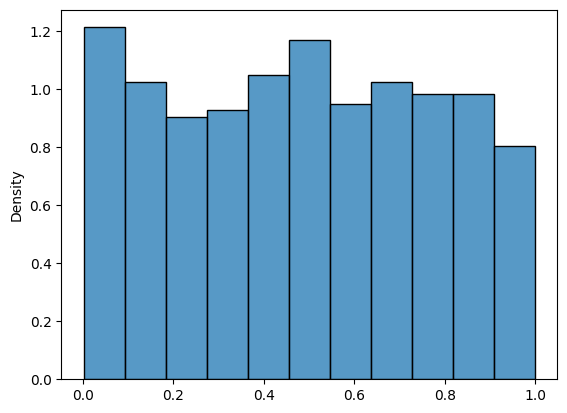

In [671]:
n = 1000
u = stats.uniform.rvs(size=n)
print(u)

sns.histplot(x=u, stat="density")

Nu vill vi göra om dessa slumptal till att komma från $\text{Exp}(\lambda)$-fördelning. Fördelningsfunktionen för en sådan fördelning är som bekant 

$F_X(x) = 1-e^{-\lambda x},\quad x \geq 0$.

<Axes: ylabel='Density'>

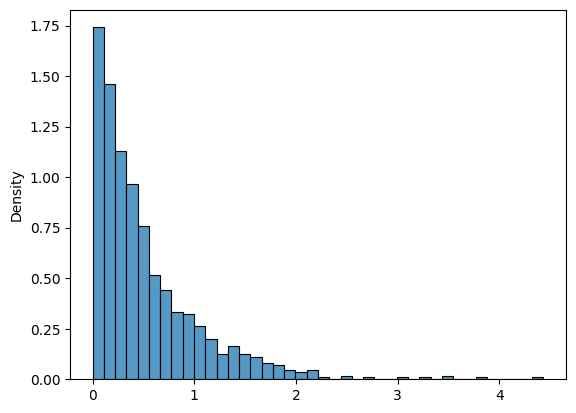

In [672]:
Lambda = 2
u = stats.uniform.rvs(size=1000)
x = - (1/Lambda) * np.log(1 - u) # Man löser ut X

sns.histplot(x=x, stat="density")



**Mozquizto:** Beräkna fördelningsfunktionens invers och använd den för att transformera slumptalen i vektorn **u** till att komma från en exponentialfördelning med $\lambda = 3$. (dvs lös ut $x$ som funktion av $u$ i $u=1-e^{-\lambda x}$.

**Uppgift:** Gör ett histogram över de exponentialfördelade slumptalen. Ser det rimligt ut? Gör även en empirisk fördelningsfunktion och se så att det verkar vara rätt fördelning.

Du kan också jämföra med direkt simulering från exponential fördelningen

<Axes: ylabel='Density'>

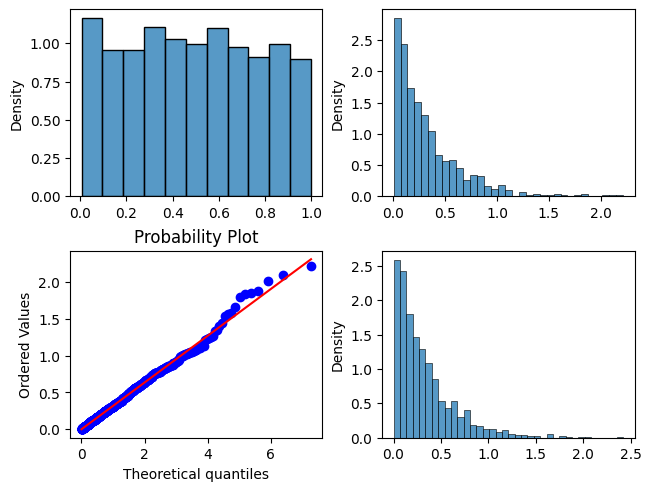

In [673]:
Lambda = 3
#invers metoden
u = stats.uniform.rvs(size=1000) # rvs står för random variates
x = - (1/Lambda) * np.log(1 - u)
#exakt simulering
x2 = stats.expon.rvs(scale=1/Lambda, size=1000)

#jämförelse av simuleringarna
fig, axs = plt.subplots(2, 2, constrained_layout=True)
#våra rektangelfördelade slumptal
sns.histplot(x=u, stat="density", ax=axs[0,0])
#våra transformerade, exponential slumptal
sns.histplot(x=x, stat="density", ax=axs[0,1])
#Kvantilplot för exponential fördelning för att se om simuleringarna stämmer
stats.probplot(x, dist=stats.expon, fit=True, plot=axs[1,0])
#simulerade exponential i ett histogram att jämföra med
sns.histplot(x=x2, stat="density", ax=axs[1,1])